<h1 style="text-align: center;">Title: Breast Cancer</h1>  


<h1 style="text-align: center;">Introduction and Problem Definition</h1>    

I used the Breast Cancer Data Set for this project. This data is obtained from National Cancer Institute (NCI)-Surveillance, Epidemiology, and End Results (SEER) program Breast cancer is one of the most common diseases in the world and mainly affects women, but can also affect men. Family history and other factors such as drinking alcohol, obesity, and mutation in certain genes may increase breast cancer. Some symptoms include a lump or thickening in or near the breast, change in size, scaly or swollen skin on the nipple, etc. Several tests used to diagnose breast cancer are clinical breast exams, mammograms, MRIs, ultrasound exams, and biopsy. If the test shows the prevalence of breast cancer, the decision about the treatment of breast cancer is made based on the size of the cancer how quickly the cancer cell is growing, how the treatment works, or how likely the cancer may come back. 
This particular data set has 4024 entries and 16 variables. Some variables include different stages of breast cancer such as N Stage (the extent to which the cancer has spread to the lymph nodes), T stage (different stages of tumors), and grade which indicates whether the cancer cells are differentiated or still resemble normal cells. 

**Question:** Based on the given data, can we predict the survival rate of breast cancer based on age, Tumor size, stage of cancer (T stage), N Stage, estrogen, and progesterone statuses, and whether or not the regional nodes are positive?



**<div style="text-align: center;">Anatomy of Breast Cancer</div>** 
The image below illustrates a breast with cancer, indicated by the red dashed line, highlighting the area requiring surgical removal. 

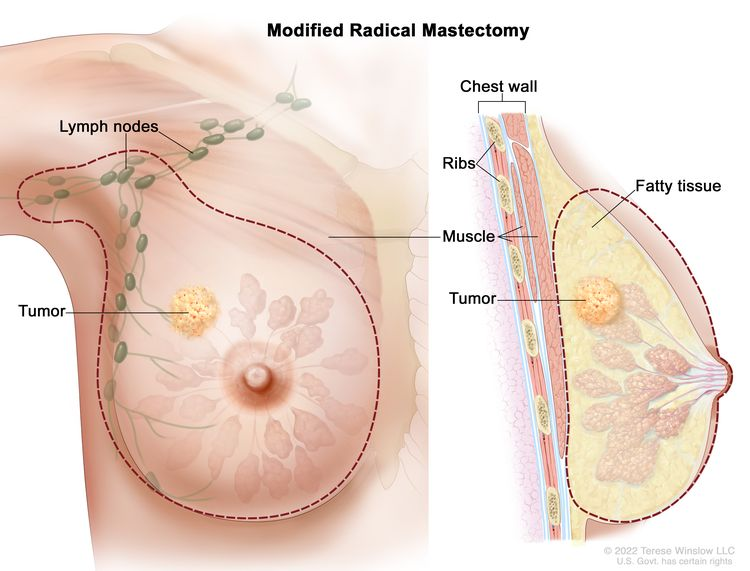

In [200]:
from IPython.display import Image, display
image_path = '/Users/tworkneh/Downloads/415523-750.jpg' #importing the anatomy (structure) of breast cancer
display(Image(filename=image_path))

**<div style="text-align: center;">Importing our data and overview of the imported data.</div>**

In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Breast_Cancer.csv')
df.head()
#print(df.head()) #shows the first three rows (python has 0 index)
#print(df.columns) 
#print(df.dtypes) #data type

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


**<div style="text-align: center;">Handling Missing Values</div>**  
The following code shows the missing values and if there is no missing value, our data is complete and ready for analysis. 

In [205]:
print(df.isnull().sum())

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64


**<div style="text-align: center;">The Demographics of Breast Cancer Patients (Age, Race, and Marital Status)</div>**  
Age is considered to be one of the significant factors in breast cancer. The following data shows a substantial increase in breast cancer with age, with the highest counts around age 46 to 55. The data suggests the significance of age and how yearly checkups can be beneficial for women in their 40s and 50s.

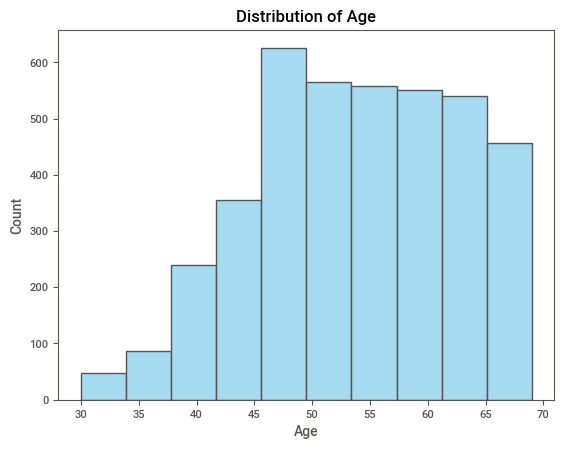

53.97216699801193
54.0
0    46
Name: Age, dtype: int64


In [209]:
#Age
age =df.Age.unique()
#print(age)
sns.histplot(df['Age'],color ='skyblue', bins = 10)
plt.title("Distribution of Age")
plt.show()
print(df.Age.mean())
print(df.Age.median())
print(df.Age.mode())

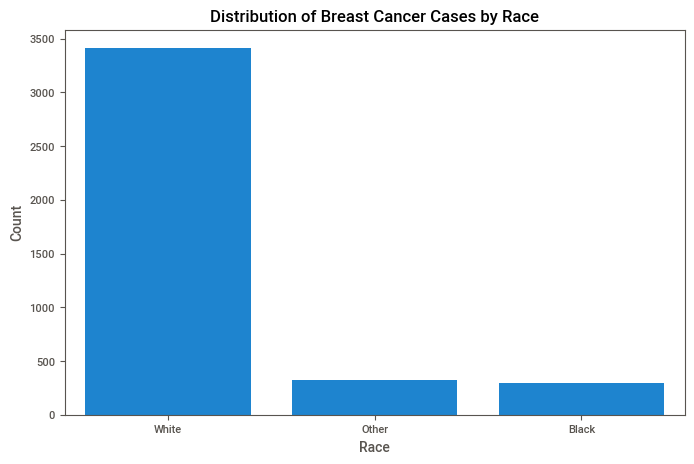

In [210]:
#Race
race = df.Race.value_counts()
frame = pd.DataFrame(race)
#print(frame)
plt.figure(figsize=(8, 5))
sns.barplot(frame, x='Race', y= df.Race.value_counts())
plt.title('Distribution of Breast Cancer Cases by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()


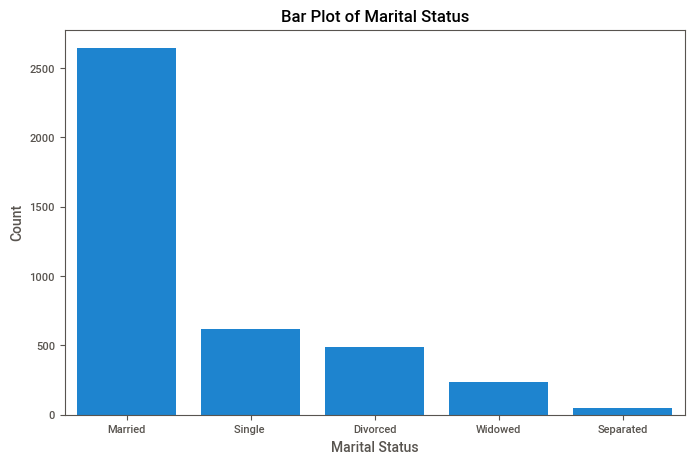

In [211]:
#Marital Status
marital_status = df['Marital Status'].value_counts()
ms = pd.DataFrame(marital_status)
plt.figure(figsize=(8,5))
sns.barplot(ms, x='Marital Status', y=df['Marital Status'].value_counts())
plt.title('Bar Plot of Marital Status')
plt.xlabel("Marital Status")
plt.ylabel('Count')
plt.show()
          

**<div style="text-align: center;">Categorical Variables</div>**  
Most of the columns are categorical variables and I am going to separate categirical variables from numerical variables.

In [213]:
#df.rename(columns = {'TStage' : 'T Stage'}, inplace=True)

df_encoded = pd.get_dummies(df, columns=['Race', 'Marital Status', 'T Stage ', 'N Stage', 'differentiate', 'Estrogen Status', 'Progesterone Status', 'Status'], drop_first=True)
#print(df_encoded)


**<div style="text-align: center;">Normalizing Numerical Variables</div>**  
I separated the categorical variables since most of the columns are categorical. Now, I'm going to normalize the columns like 'Age', 'Tumor Size', Regional Node Examined', 'Reginol Node Positive', and 'Survival Months'. Normalization is a critical step in data analysis. It is important in improving data interpretation, reducing the impact of outliers by scaling the data, etc. 

In [215]:
numerical_cols = ['Age', 'Tumor Size', 'Survival Months', 'Regional Node Examined', 'Reginol Node Positive']
scaler = MinMaxScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])
print("Normalized DataFrame head:")
print(df_encoded.head(3))

NameError: name 'MinMaxScaler' is not defined

**<div style="text-align: center;">Distribution of T Stage</div>**  
The following graph displays the T Stage (tumor stage) representing the size and extent of cancer cells in the breast, ranging from T1 to T4. T1 indicates the smallest size (less than 2cm), while T4 indicates the largest size and a more advanced spread of the disease. In addition, T3 indicated the spread to the nearby tissues, but not distant tissues, however, T4 is the highest stage in cancer indicating the spread to the nearest organs such as the chest wall and skin. More than 540 people have tumor larger than 50 millimeters, but only 10 of them have tumor grown into the chestwall and skin. 

In [ ]:
import pandas as pd


t_stage_counts = {
    'T1': 1603,
    'T2': 1786,
    'T3': 533,
    'T4': 10
}
df_counts = pd.DataFrame(list(t_stage_counts.items()), columns=['T Stage', 'Frequency'])
print(df_counts)

#Plotting the distribution of T Stage
plt.figure(figsize=(10, 6))
plt.bar(df_counts['T Stage'], df_counts['Frequency'], color='skyblue', edgecolor='black')
plt.title('Distribution of T Stage')
plt.xlabel('T Stage')
plt.ylabel('Frequency')
plt.grid(axis='y')

# Show the plot
plt.show()



**<div style="text-align: center;">Distribution of N Stage</div>**  
The N Stage is a standardized way to describe the extent of cancer in patients. N1 indicates less spread to the lymph nodes, while N3 shows excessive lymph node involvement. Generally, higher lymph node involvement suggests a greater chance for the cancer cells to spread throughout the body. However, according to the graph, N1 has significantly higher levels than N2 and N3, indicating less involvement with the lymph nodes. Therefore, the likelihood of cancer cells spreading (metastasizing) to other body parts is less likely.

In [ ]:
import pandas as pd
#Create DataFrame
n_stage_counts = pd.DataFrame({
    'Stage': ['N1', 'N2', 'N3'],
    'Count': [2732, 820, 472]
})
#print(n_stage_counts)

#Plotting the distribution of N Stage
plt.figure(figsize=(10,6))
plt.bar(n_stage_counts['Stage'], n_stage_counts['Count'], color='blue', edgecolor = 'black', width=0.5)
plt.title('Distribution of N Stage')
plt.xlabel('N Stage')
plt.ylabel('Frequency')
plt.grid(axis='y')

# Show the plot
plt.show()

**<div style="text-align: center;">The relationship Between Tumor Size and Survival Months</div>**  
The graph shows that there is somehow an inverse relationship between the tumor size and survival months. It indicates that people with smaller tumor sizes tend to live slightly longer. Breast cancer with a larger tumor size also suggests that the disease is more advanced and often classified as T2 or higher.

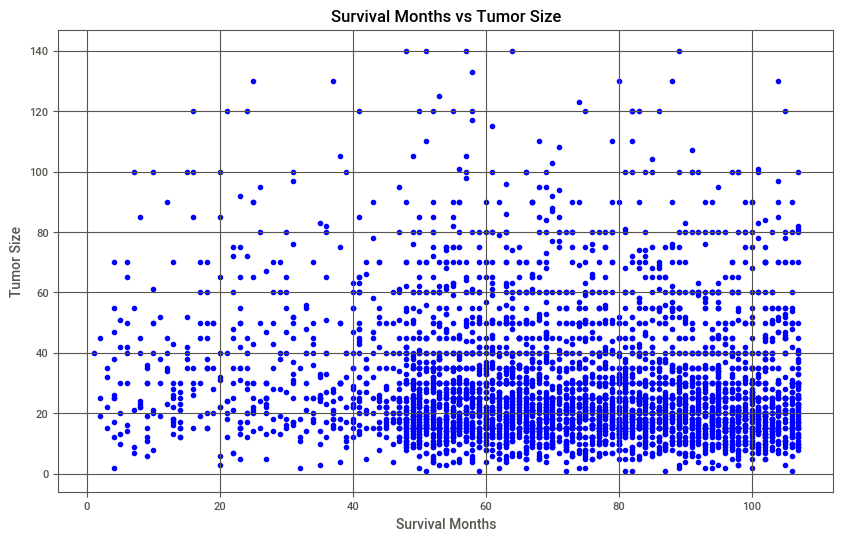

In [216]:
import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
import seaborn as sns

#Scatter plot of Tumor Size vs Survival Months
plt.figure(figsize=(10, 6))
plt.scatter(x=df_encoded['Survival Months'], y=df_encoded['Tumor Size'], color='blue')  
plt.title('Survival Months vs Tumor Size')
plt.xlabel('Survival Months')
plt.ylabel('Tumor Size')
plt.grid()
plt.show()

**<div style="text-align: center;">Is there any relationship between regional node-positive and survival months?</div>**  
The regional node positive indicates the spread of cancer cells to the lymph nodes. The positive lymph node is the indication that cancer cells are being metastasized to other parts of the body, which can be very lethal depending on where and how fast the cancer cells are spreading. The following graph shows that people with breast cancer who have low regional node positives tend to live longer. As the number of nodes with cancer cells increases, the survival months (rate) of people with breast cancer decreases. Therefore, the following graph shows an inverse relationship between Regional Node Positive and Survival Months. 

In [222]:
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


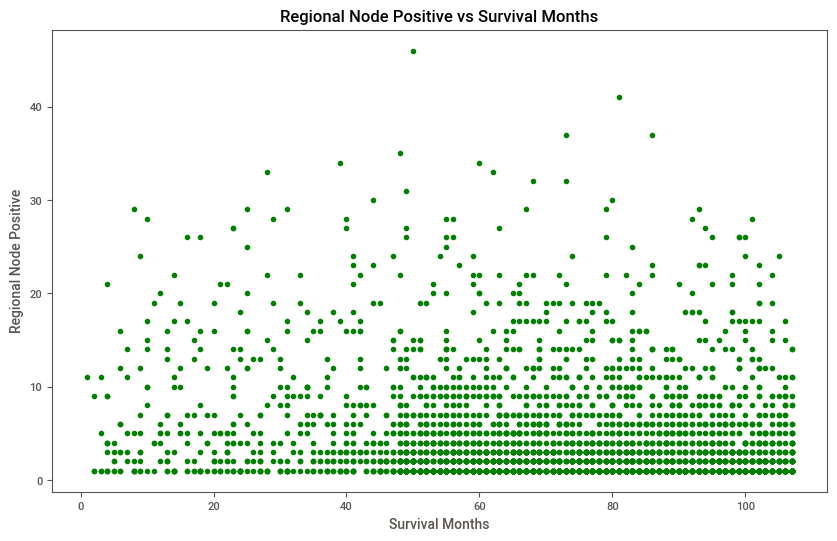

In [224]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(x=df_encoded['Survival Months'], y = df_encoded['Reginol Node Positive'], color = 'green')
plt.title('Regional Node Positive vs Survival Months')
plt.xlabel('Survival Months')
plt.ylabel('Regional Node Positive')
plt.show()

**<div style="text-align: center;">Age and Survival Months relationships</div>**  
The graph of age vs. survival months shows little to no correlation and insufficient evidence of a relationship.

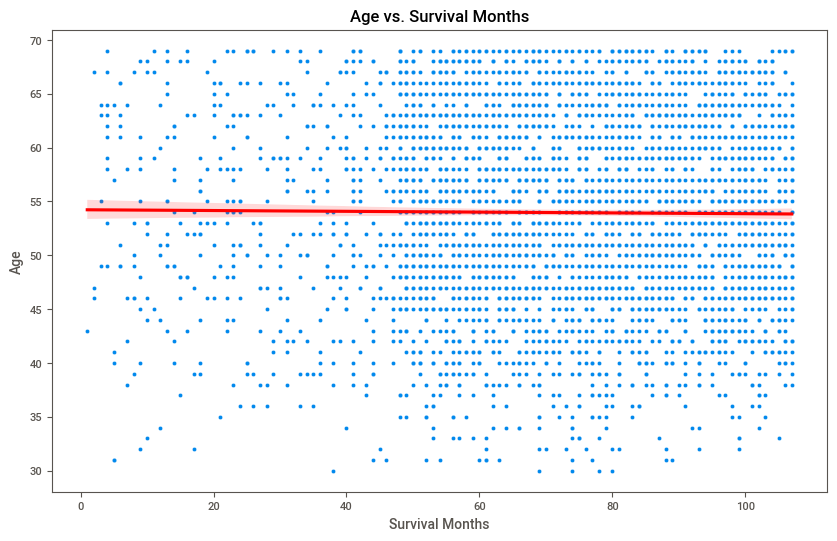

In [229]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Survival Months', y='Age')
sns.regplot(data=df, x='Survival Months', y='Age', color='red', scatter=False)
plt.title("Age vs. Survival Months")
plt.xlabel("Survival Months")
plt.ylabel("Age")
plt.show()

**<div style="text-align: center;">What does the '6th Stage' tell us about the spread of breast cancer?</div>**  
The "6th Stage" is basically the classification of cancer stages based on the system used to describe cancer spread. These sub-stages described in this study are IIA, IIB, IIIA, IIIB, and IIIC. The first sub-stage IIA shows that the tumor is larger than stage I but did not spread extensively. Even though the cancer is still localized, it might have spread to the nearby lymph nodes. Stage IIIC is characterized by cancer spreading to several lymph nodes (more than 10 lymph nodes), can be large and aggressive, and requires aggressive treatment. These classical sub-stages of cancer help determine the treatment type and predict the outcome. 

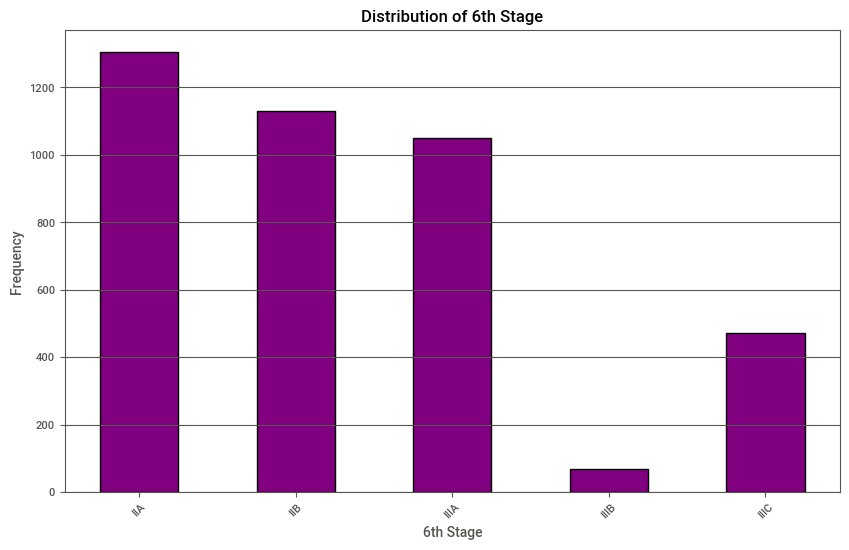

In [231]:
import pandas as pd
import matplotlib.pyplot as plt
six_stage = pd.DataFrame({
    'Stage':['IIA',  'IIB', 'IIIA', 'IIIB', 'IIIC'],
    'Frequency': [1305, 1130, 1050,   67,  472 ]
})


#bar plot
plt.figure(figsize=(10,6))
plt.bar(six_stage['Stage'], six_stage['Frequency'], color='purple', edgecolor = 'black', width=0.5)
plt.title('Distribution of 6th Stage')
plt.xlabel('6th Stage')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.show()

**<div style="text-align: center;">The Status of Estrogen and Progesterone</div>**  
The status of estrogen and progesterone in breast cancer patients plays a significant role in determining the treatment options and predicting the outcome. The majority of this data shows the positive status of estrogen and progesterone, meaning these hormones have receptors that can respond to hormone therapies during treatment. Positive estrogen and progesterone also grow slower than estrogen and progesterone with negative receptors. The negative status of both hormones has fewer treatment options and worse outcomes. 

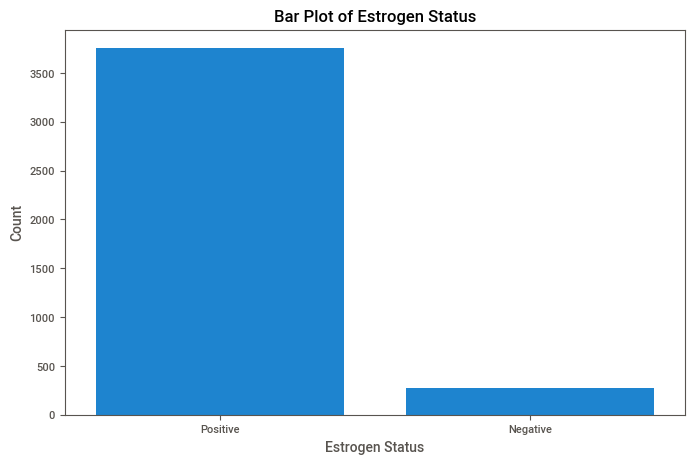

In [233]:
#Estrogen Status
estrogen = df['Estrogen Status'].value_counts()
frame = pd.DataFrame(estrogen)
#print(frame)
#plot
plt.figure(figsize=(8,5))
sns.barplot(frame, x = 'Estrogen Status', y = df['Estrogen Status'].value_counts())
plt.title('Bar Plot of Estrogen Status')
plt.xlabel('Estrogen Status')
plt.ylabel('Count')
plt.show()

                     count
Progesterone Status       
Positive              3326
Negative               698


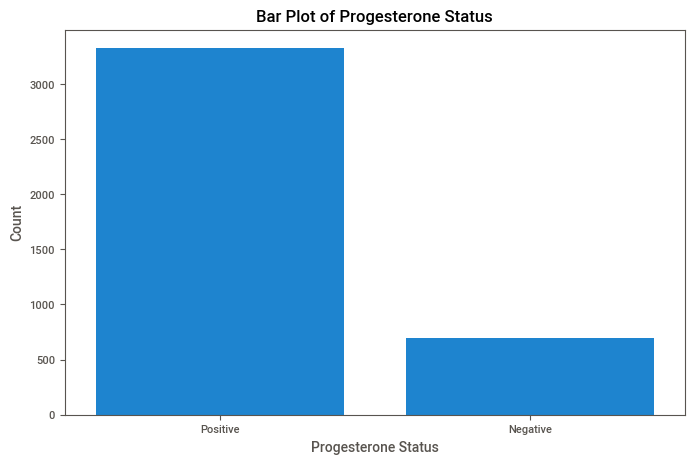

In [234]:
#Progesterone Status
progesterone = df['Progesterone Status'].value_counts()
frame1 = pd.DataFrame(progesterone)
print(frame1)
plt.figure(figsize=(8,5))
sns.barplot(frame1, x = 'Progesterone Status', y = df['Progesterone Status'].value_counts())
plt.title('Bar Plot of Progesterone Status')
plt.xlabel('Progesterone Status')
plt.ylabel('Count')
plt.show()

**<div style="text-align: center;">Status</div>**

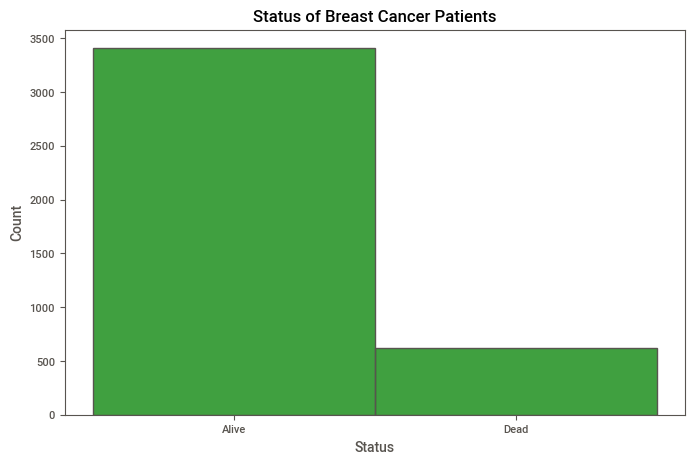

In [236]:
#Status
status = df.Status.value_counts()
frame =pd.DataFrame(status) 
#print(frame) #prints the data frame

#bar plot
plt.figure(figsize=(8,5))
sns.histplot(df['Status'], color = 'green')
plt.title('Status of Breast Cancer Patients')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

**<div style="text-align: center;">Conclusion</div>**  
In conclusion, I want to use 'sns.pairplot()' to visualize the overall relationship of all variables based on the 'Status' of the patients.   

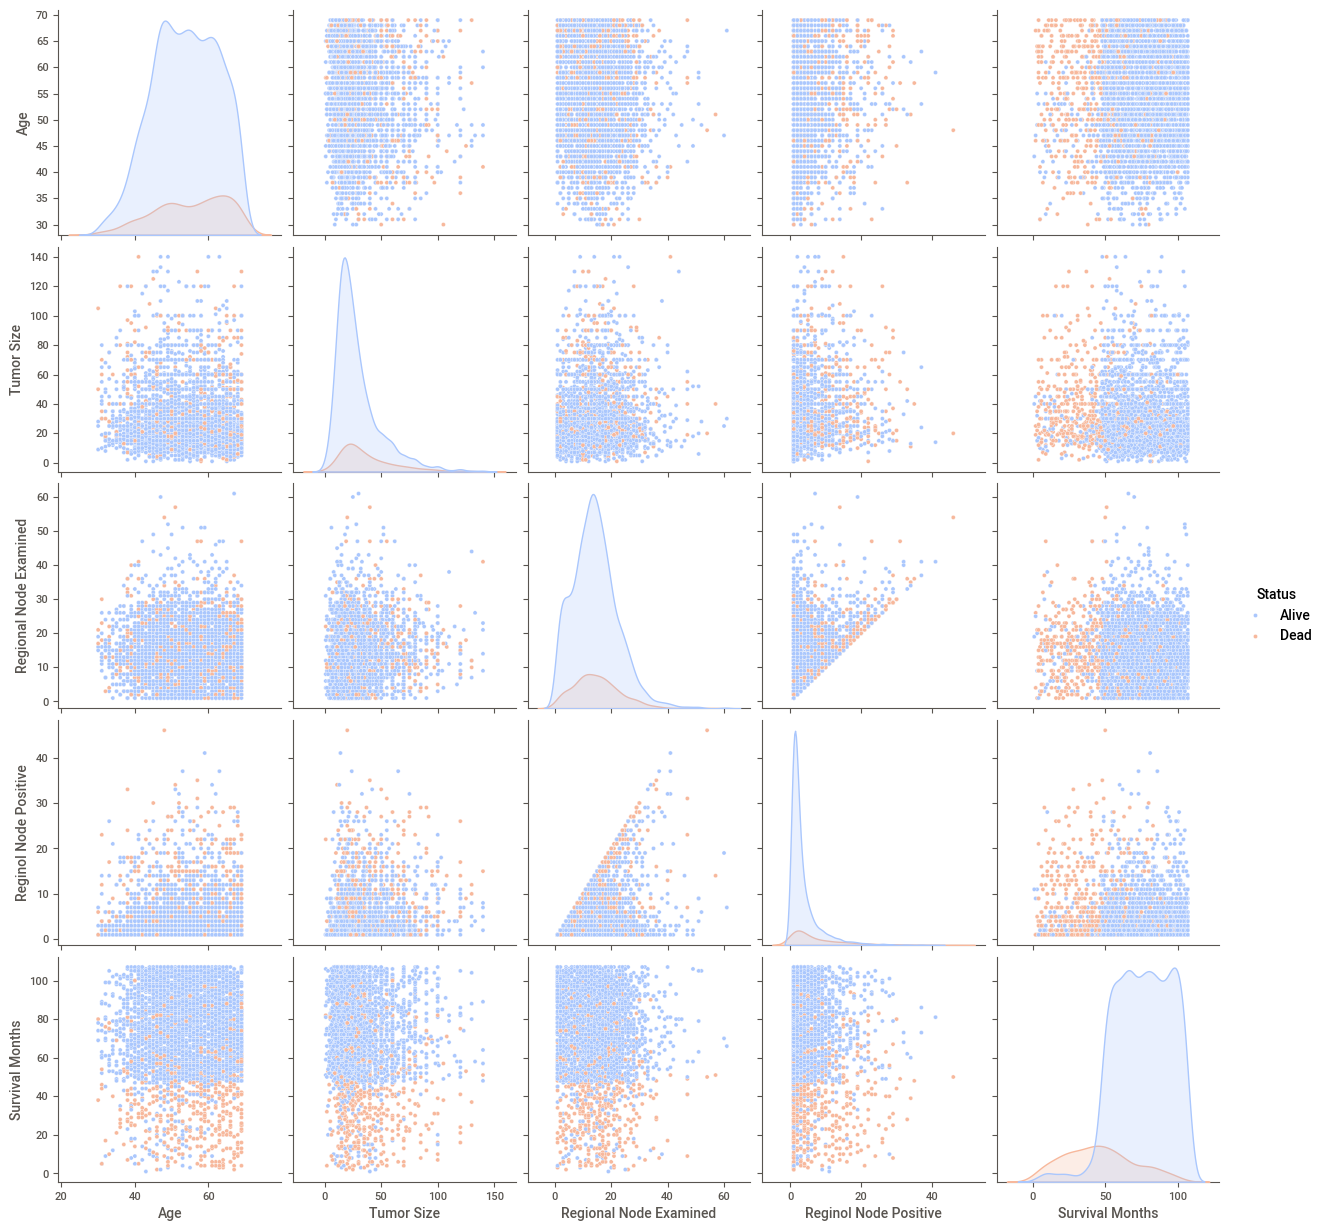

In [238]:
#plt.figure(figsize=(10,6))
sns.pairplot(df, hue ="Status", palette ='coolwarm')
plt.show()

**<div style="text-align: center;">References**</div>

In [244]:
import sweetviz
reports = sweetviz.analyze(df)
reports.show_html(layout='vertical')

                                             |      | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [246]:
from ydata_profiling import ProfileReport
report = ProfileReport(df.iloc[:,0:5])
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████| 5/5 [00:00<00:00, 17175.69it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [250]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [252]:

categorical_cols = [
    'Race', 'Marital Status', 'N Stage', '6th Stage',
    'differentiate', 'A Stage', 'Estrogen Status',
    'Progesterone Status', 'Status'
]

for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col].astype(str))

In [253]:
import seaborn as sns


/var/folders/lp/5630qj3n0lj_nrzvzd9163c00000gn/T/ipykernel_76212/1331554928.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age, color='red')


<Axes: xlabel='Age', ylabel='Density'>

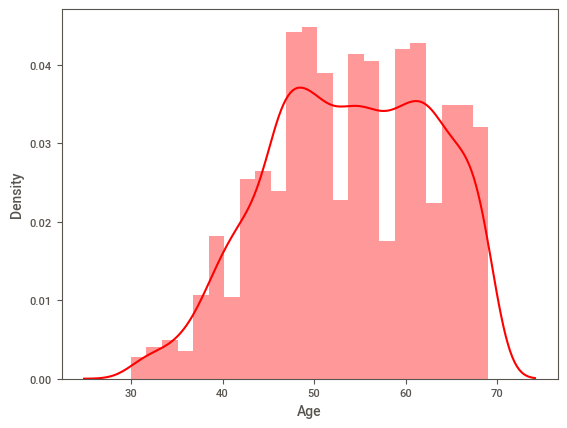

In [254]:
sns.distplot(df.Age, color='red')

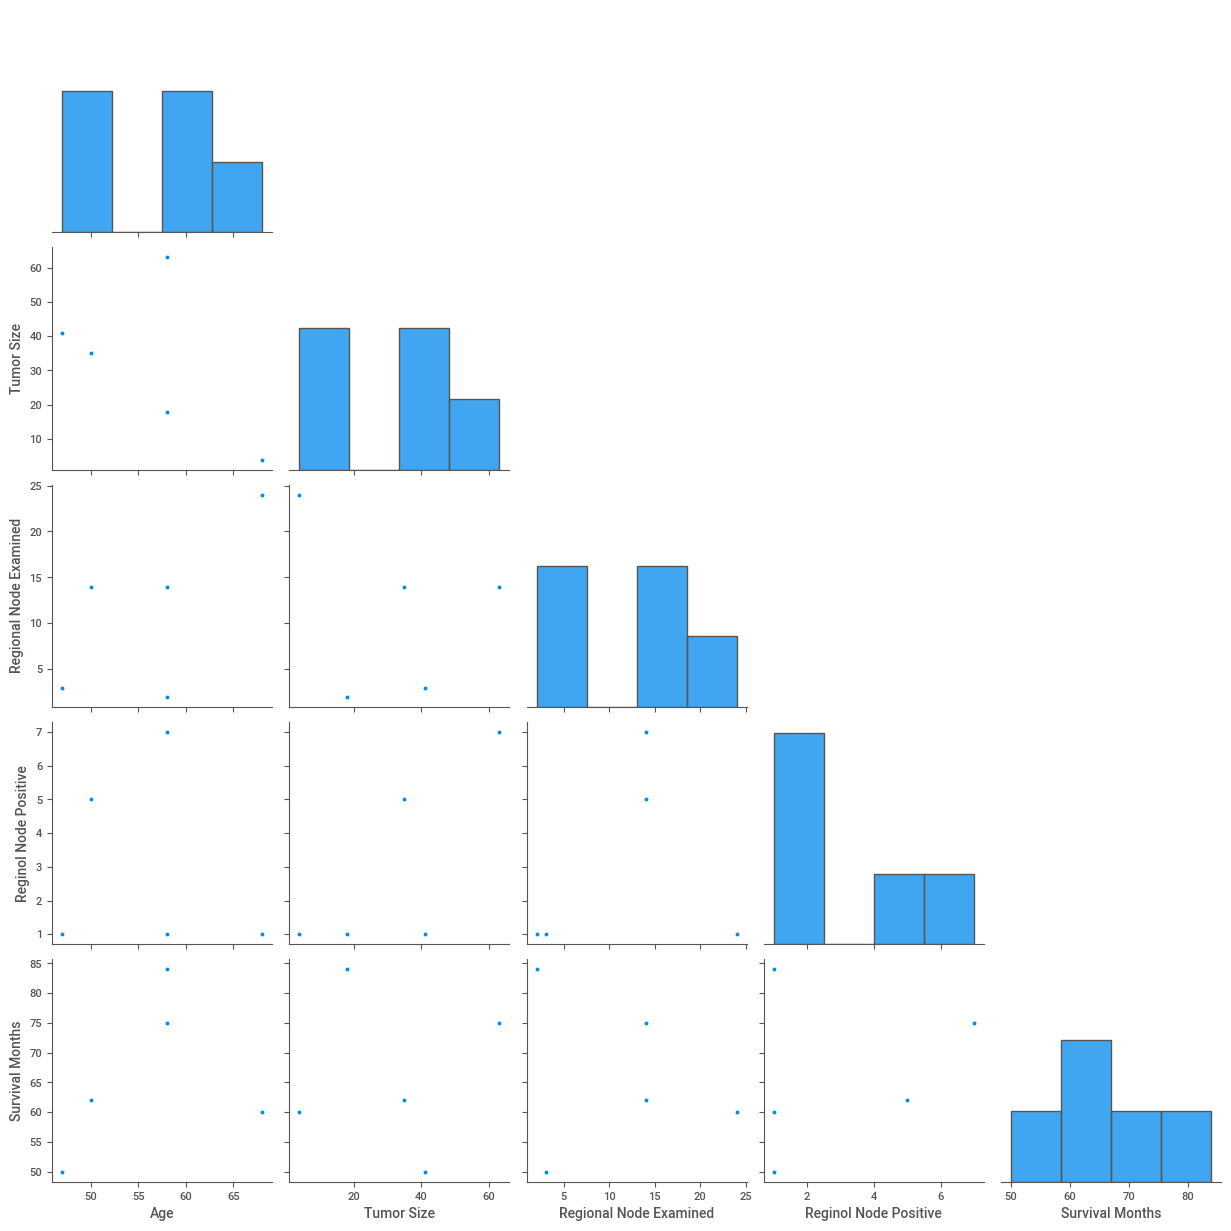

In [187]:
sns.pairplot(df.iloc[0:5], corner=True)

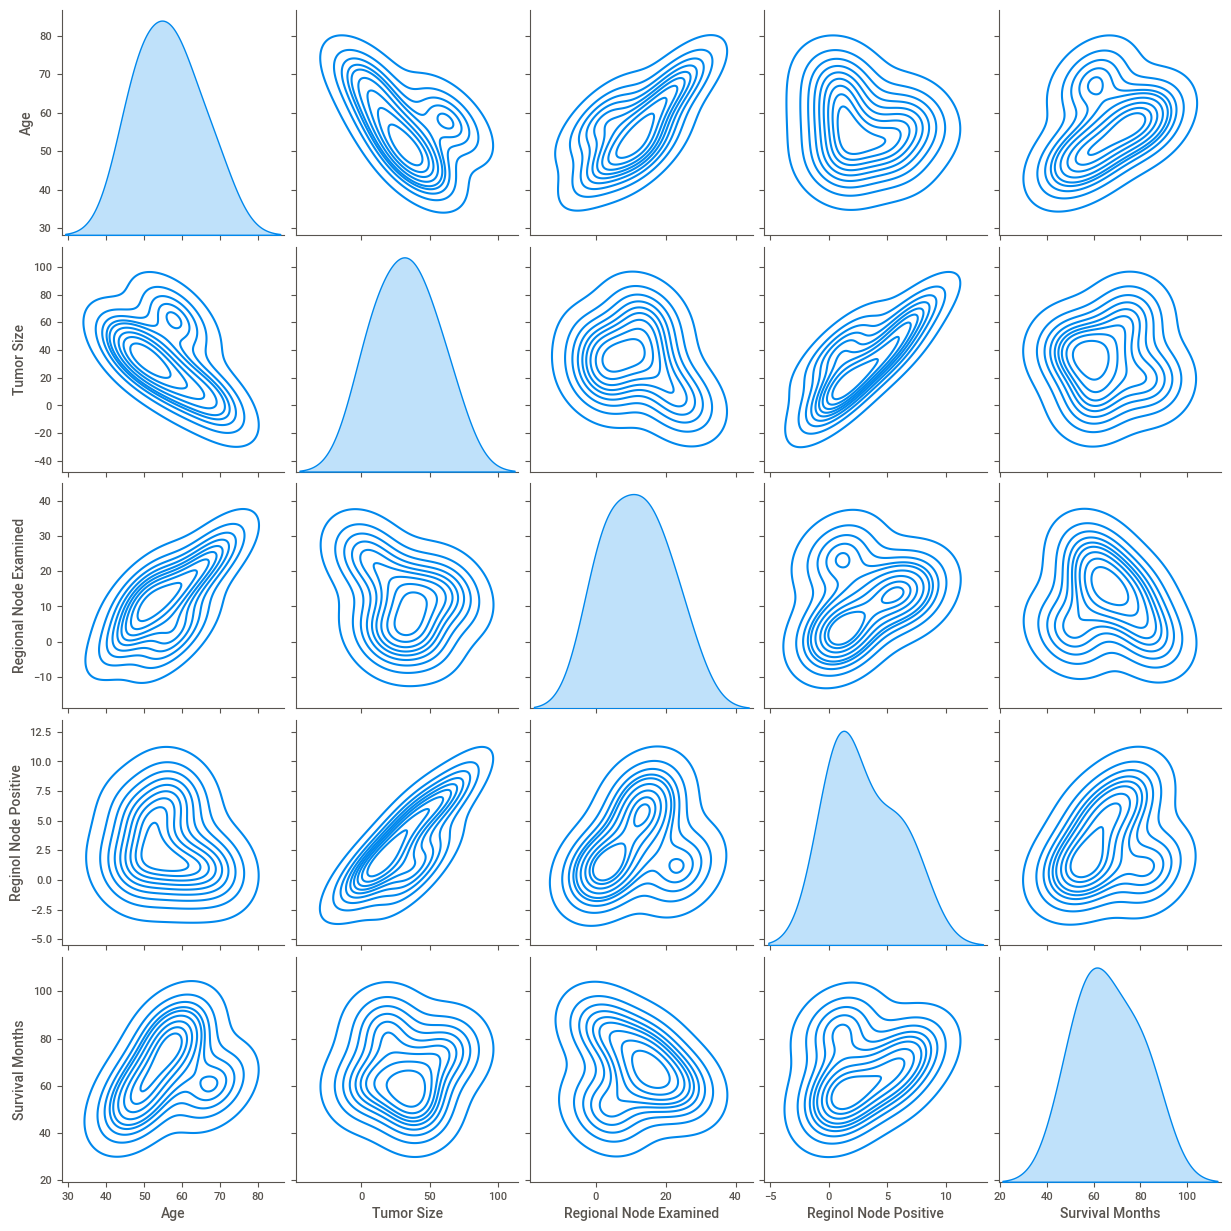

In [191]:
sns.pairplot(df.iloc[0:5], kind='kde')

In [193]:
# APA citation for the website
citation = (
    "Namdari, R. (Nov 2017). Breast cancer dataset. Kaggle. "
    "https://www.kaggle.com/datasets/reihanenamdari/breast-cancer"
)
citation1 = (
    "National Cancer Institute. (n.d.). Breast cancer treatment (PDQ®)–Health professional version. "
    "U.S. Department of Health and Human Services. https://www.cancer.gov/types/breast/patient/breast-treatment-pdq#_148"
)

print(citation)
print(citation1)


Namdari, R. (Nov 2017). Breast cancer dataset. Kaggle. https://www.kaggle.com/datasets/reihanenamdari/breast-cancer
National Cancer Institute. (n.d.). Breast cancer treatment (PDQ®)–Health professional version. U.S. Department of Health and Human Services. https://www.cancer.gov/types/breast/patient/breast-treatment-pdq#_148
